### Solar Phase Angle vs. Brightness Plot
This code reads the Pomenis observation database and creates a plot
of AB Magnitude vs. Solar Phase Angle

In [26]:
# Imports
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import pandas as pd
import numpy as np
import astropy.coordinates
import astropy.time
import lumos.calculator
import lumos.conversions

In [27]:
# Read Pomenis database
data = pd.read_csv("../data/pomenis_observations.csv", comment = "#")

satellite_heights = 1000 * (data['satellite_height'].to_numpy())
observation_times = data['observation_time'].to_numpy()
satellite_altitudes = data['satellite_altitude'].to_numpy()
satellite_azimuths = data['satellite_azimuth'].to_numpy()
measured_magnitudes = data['ab_magnitude'].to_numpy()

mount_lemmon = astropy.coordinates.EarthLocation(lat = 32.4434, lon = -110.7881)

In [28]:
# Compute solar phase angles
sun_altitudes = np.zeros(observation_times.shape)
sun_azimuths = np.zeros(observation_times.shape)
solar_phase_angles = np.zeros(observation_times.shape)

for i, time in enumerate(observation_times):
    t = astropy.time.Time(time, format = 'isot')
    sun_altitudes[i], sun_azimuths[i] = lumos.calculator.get_sun_alt_az(t, mount_lemmon)

sat_x, sat_y, sat_z = lumos.conversions.altaz_to_unit(satellite_altitudes, satellite_azimuths)
sun_x, sun_y, sun_z = lumos.conversions.altaz_to_unit(sun_altitudes, sun_azimuths)

solar_phase_angles = np.arccos( - (sat_x * sun_x + sat_y * sun_y + sat_z * sun_z) )
solar_phase_angles = np.degrees(solar_phase_angles)

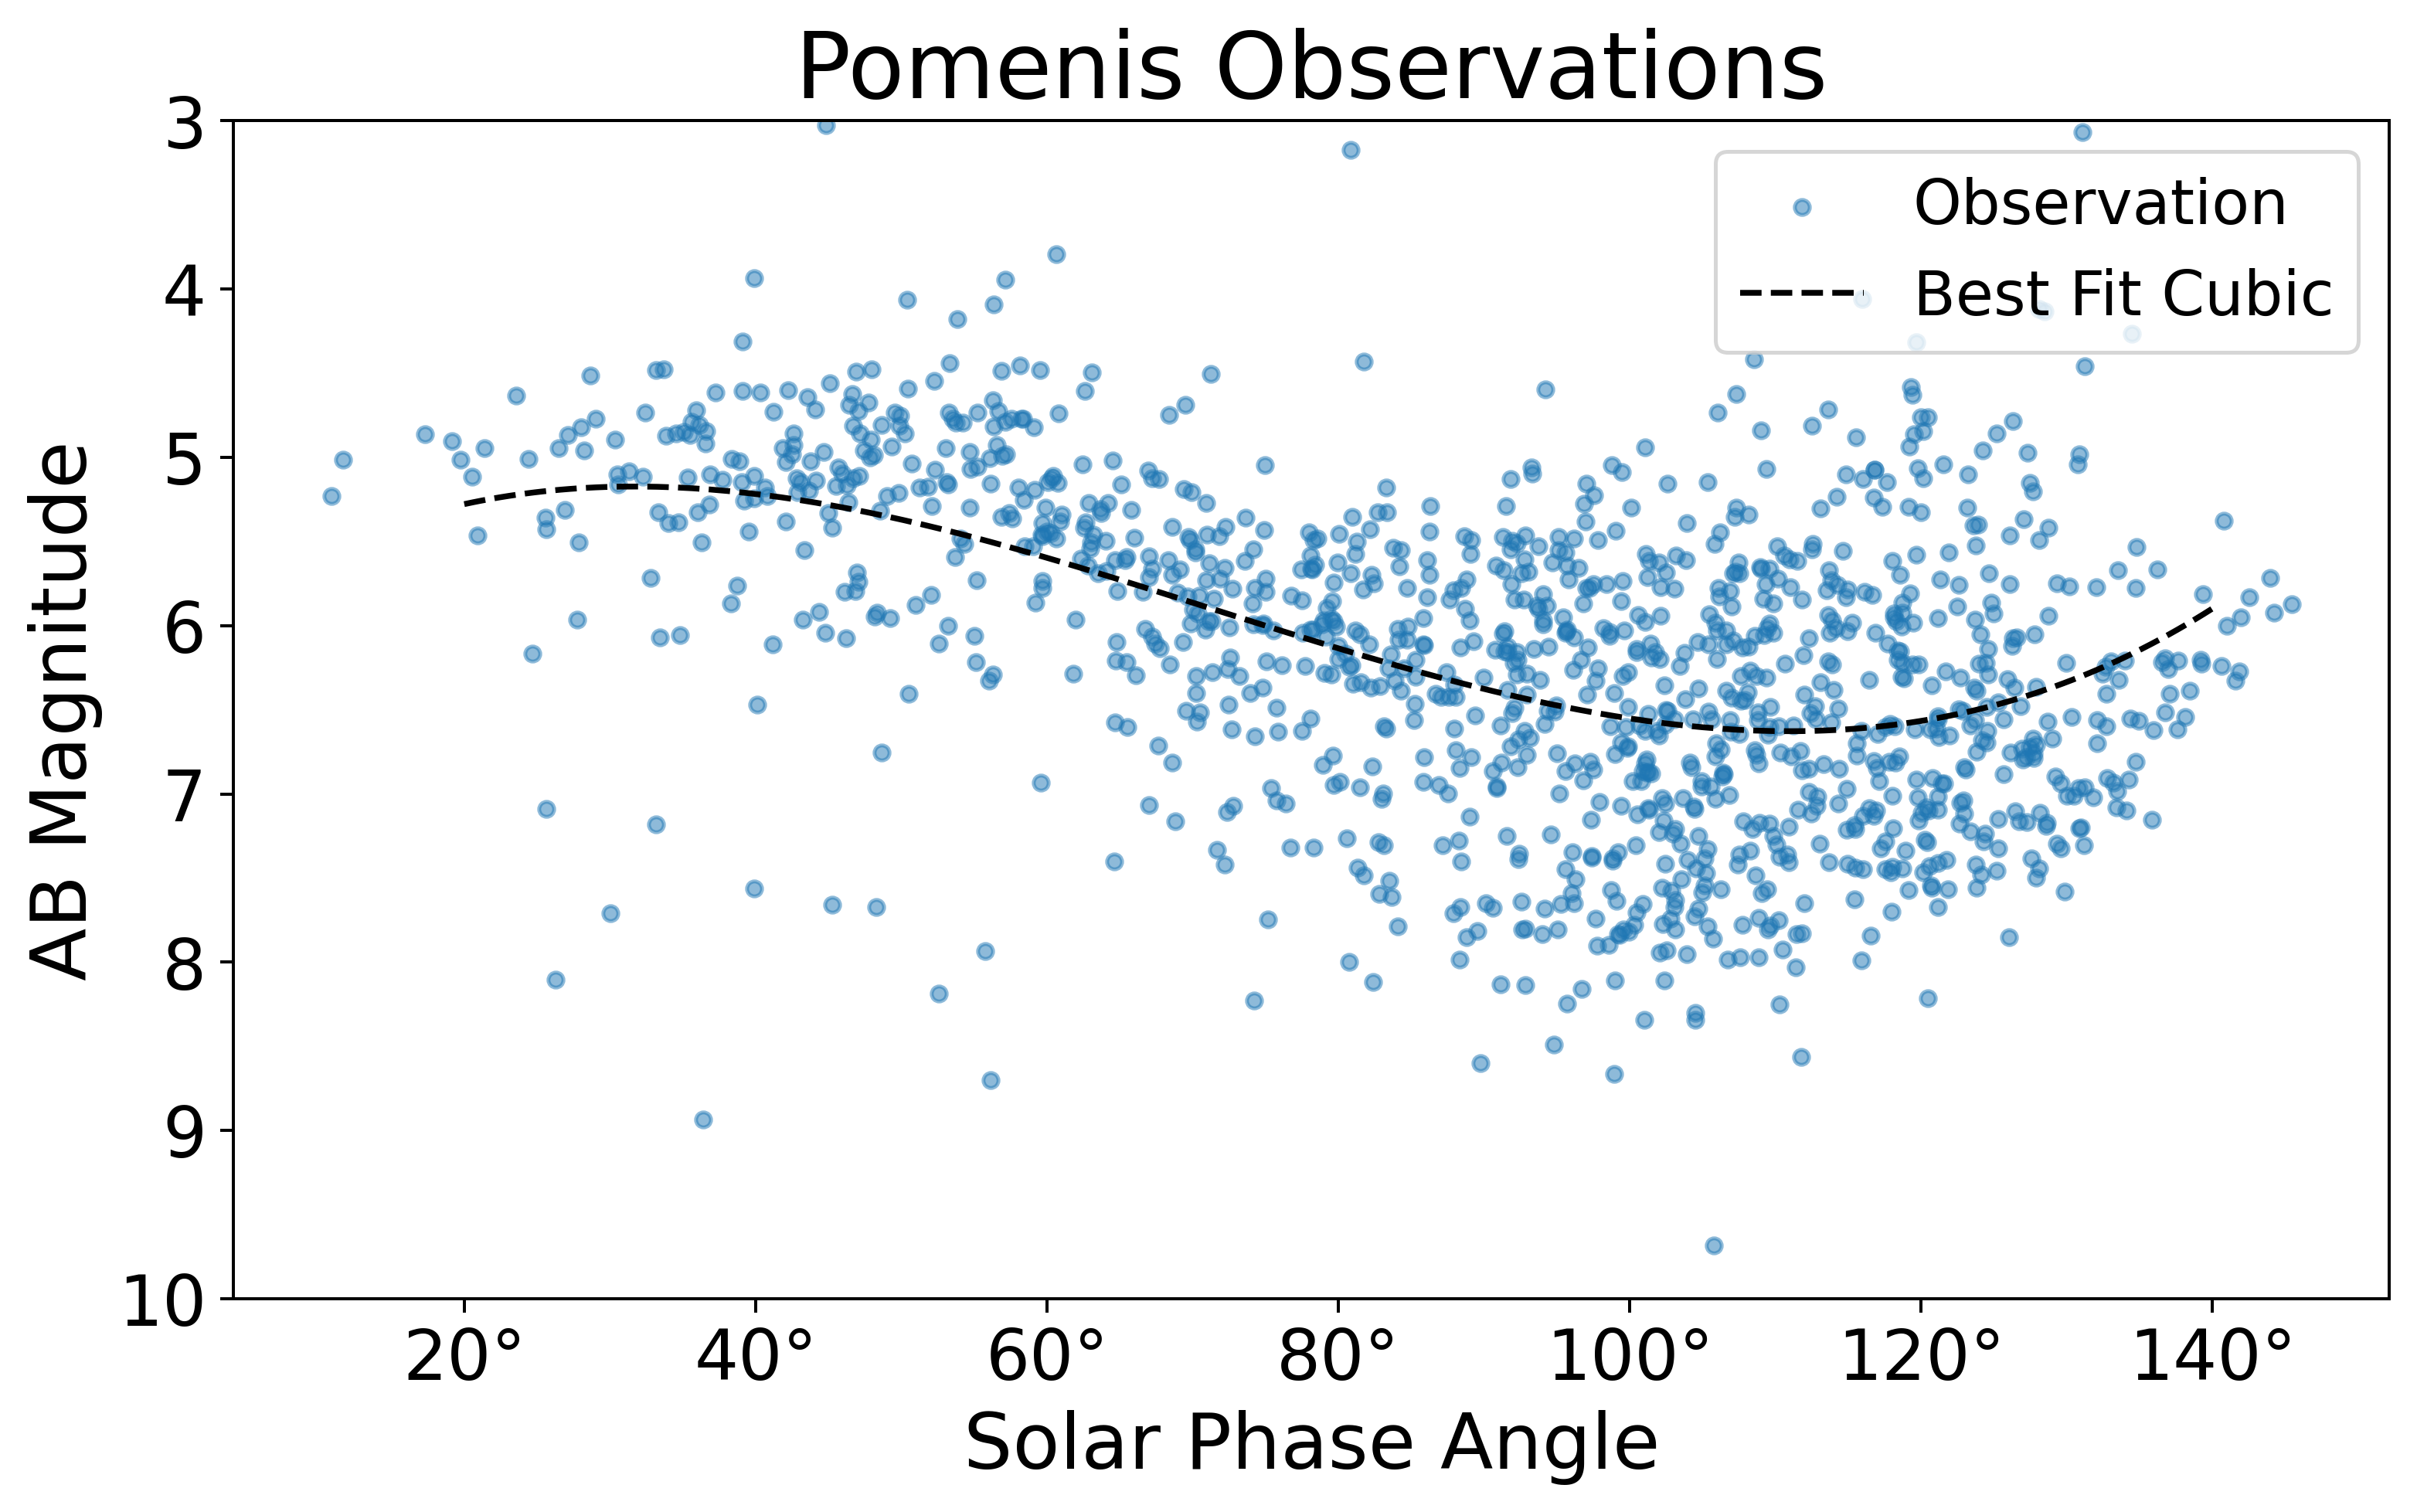

In [29]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize = (10, 5.5), dpi = 360)

ax.set_ylim(3, 10)
ax.invert_yaxis()
ax.set_xlabel("Solar Phase Angle", fontsize = 20)
ax.set_ylabel("AB Magnitude", fontsize = 20)
ax.set_title("Pomenis Observations", fontsize = 24)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.set_major_formatter(StrMethodFormatter(u"{x:.0f}°"))

# Scatter plot of observations
ax.scatter(solar_phase_angles, measured_magnitudes,
           alpha = 0.5,
           s = 15,
           label = "Observation")

# Best Fit Cubic
a1, a2, a3, a4 = np.polyfit(solar_phase_angles, measured_magnitudes, deg = 3)
x = np.linspace(20, 140, 200)
y = a1*x**3 + a2*x**2 + a3*x + a4
ax.plot(x, y, "--k", label = "Best Fit Cubic")

ax.legend(loc = 1, prop = {'size': 16})
plt.show()